In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv("data/silver.csv")
pd.set_option('display.max_columns', None)  

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824364 entries, 0 to 824363
Data columns (total 20 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Invoice                                      824364 non-null  object 
 1   StockCode                                    824364 non-null  object 
 2   Description                                  824364 non-null  object 
 3   Quantity                                     824364 non-null  int64  
 4   InvoiceDate                                  824364 non-null  object 
 5   year                                         824364 non-null  int64  
 6   month                                        824364 non-null  int64  
 7   Price                                        824364 non-null  float64
 8   Customer ID                                  824364 non-null  float64
 9   Country                                      824364 non-nul

In [3]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'year', 'month', 'Price', 'Customer ID', 'Country', 'Total',
       'total_facture', 'Montant', 'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011', 'TT_annuler'],
      dtype='object')


In [4]:
# profile =ProfileReport(df, title = "Profiling Report")
# profile.to_widgets()

In [5]:
Country_uniques = df['Country'].unique()
print(Country_uniques)

['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Nigeria'
 'Malta' 'RSA' 'Singapore' 'Bahrain' 'Thailand' 'Israel' 'Lithuania'
 'West Indies' 'Korea' 'Brazil' 'Canada' 'Iceland' 'Lebanon'
 'Saudi Arabia' 'Czech Republic' 'European Community']


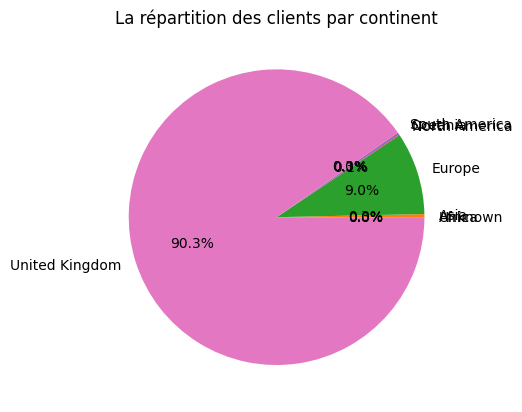

In [6]:
country_to_continent = {
'United Kingdom': 'United Kingdom',
'France': 'Europe',
'USA': 'North America',
'Belgium': 'Europe',
'Australia': 'Oceania',
'EIRE': 'Europe',
'Germany': 'Europe',
'Portugal': 'Europe',
'Japan': 'Asia',
'Denmark': 'Europe',
'Netherlands': 'Europe',
'Poland': 'Europe',
'Spain': 'Europe',
'Channel Islands': 'Europe',
'Italy': 'Europe',
'Cyprus': 'Asia',
'Greece': 'Europe',
'Norway': 'Europe',
'Austria': 'Europe',
'Sweden': 'Europe',
'United Arab Emirates': 'Asia',
'Finland': 'Europe',
'Switzerland': 'Europe',
'Unspecified': 'Unknown',
'Nigeria': 'Africa',
'Malta': 'Europe',
'RSA': 'Africa',
'Singapore': 'Asia',
'Bahrain': 'Asia',
'Thailand': 'Asia',
'Israel': 'Asia',
'Lithuania': 'Europe',
'West Indies': 'North America',
'Korea': 'Asia',
'Brazil': 'South America',
'Canada': 'North America',
'Iceland': 'Europe',
'Lebanon': 'Asia',
'Saudi Arabia': 'Asia',
'Czech Republic': 'Europe',
'European Community': 'Europe'
}

df['Continent'] = df['Country'].map(country_to_continent)

data = df.groupby('Continent')['Invoice'].nunique()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('La répartition des clients par continent')

plt.show()


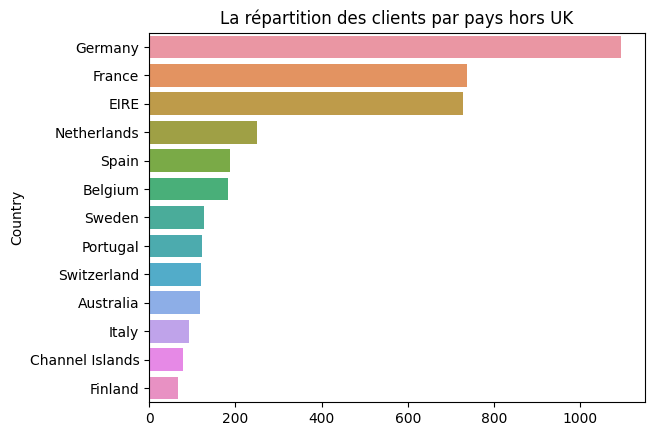

In [70]:
import seaborn as sns

data = df[df['Country'] != 'United Kingdom'].groupby('Country')['Invoice'].nunique().sort_values(ascending=False).head(13)
sns.barplot(x=data.values, y=data.index)
plt.title('La répartition des clients par pays hors UK')

plt.show()


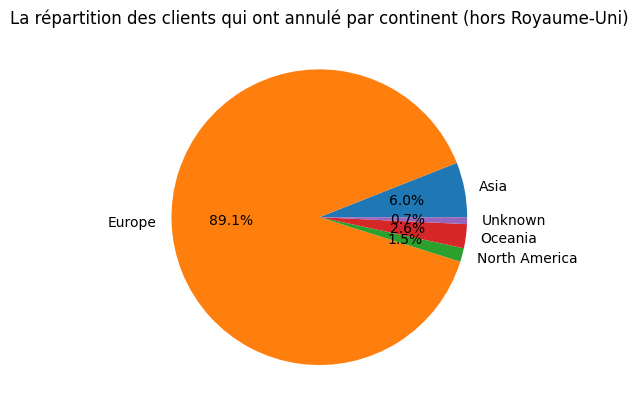

In [7]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par continent et compter le nombre de clients uniques qui ont annulé
data = df_filtered[df_filtered['Invoice'].str.contains('C')].groupby('Continent')['Customer ID'].nunique()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('La répartition des clients qui ont annulé par continent (hors Royaume-Uni)')
plt.show()

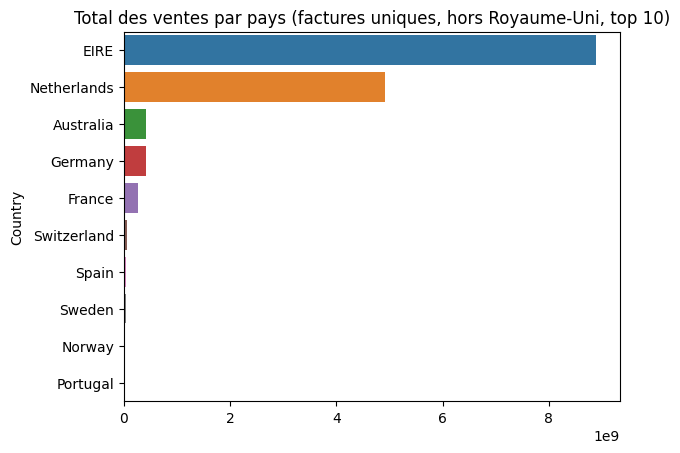

In [8]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['Montant'].sum().sort_values(ascending=False).head(10)

# Créer un graphique à barres
sns.barplot(x=data.values, y=data.index)
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni, top 10)')
plt.show()

In [9]:
# Supposons que votre DataFrame s'appelle df
# Filtrer les données pour ne garder que les client uniques
df_unique_invoices = df.drop_duplicates(subset='Customer ID')

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_unique_invoices.groupby('Country')['Montant'].sum().sort_values(ascending=False)

# Créer un DataFrame à partir des données
table = pd.DataFrame(data)

# Formater les montants avec des séparateurs de milliers
table['Montant'] = table['Montant'].apply(lambda x: '{:,.2f}'.format(x))

# Afficher le tableau
print(table)


                             Montant
Country                             
United Kingdom        443,237,325.88
Netherlands            30,612,324.88
EIRE                   26,280,805.54
Germany                15,419,215.79
Australia              12,506,467.80
France                 12,389,011.90
Switzerland             7,688,357.95
Spain                   3,337,721.11
Norway                  3,041,558.53
Portugal                2,361,481.04
Belgium                 1,866,290.04
Denmark                 1,805,258.41
Sweden                  1,759,292.72
Channel Islands         1,663,222.02
Italy                   1,206,925.17
Cyprus                  1,106,100.14
Greece                  1,075,514.68
Japan                   1,045,546.35
Israel                  1,010,601.60
Finland                   951,444.57
Austria                   900,071.13
Singapore                 741,604.28
United Arab Emirates      472,694.67
Malta                     354,649.03
Unspecified               349,207.78
L

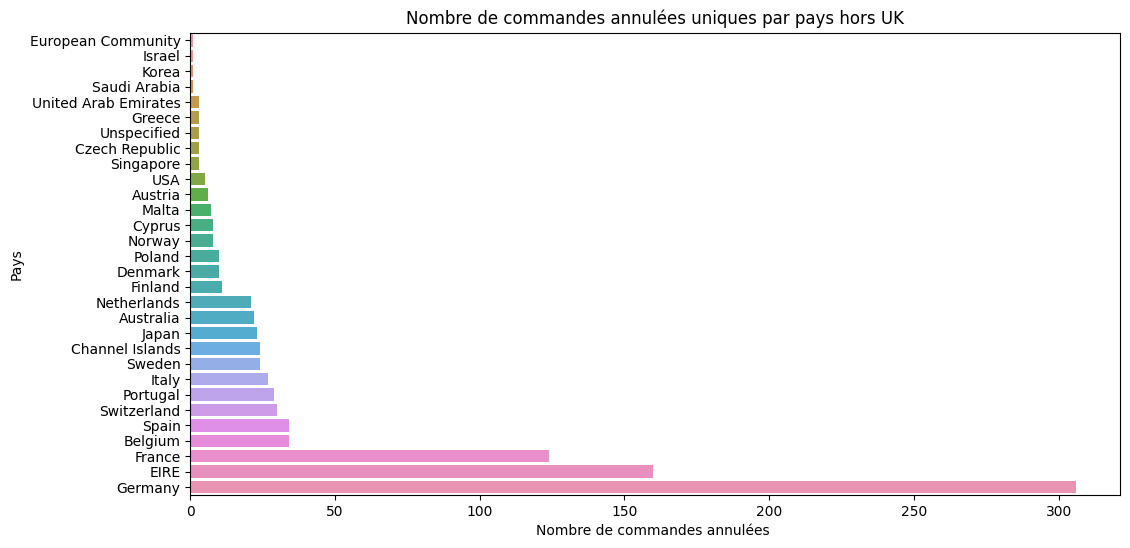

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les commandes annulées
cancelled_orders = df[df['Invoice'].str.startswith('C')]

# Filtrer les données pour exclure le Royaume-Uni
cancelled_orders = cancelled_orders[cancelled_orders['Country'] != 'United Kingdom']

# Grouper les données par 'Country' et compter le nombre de commandes annulées uniques pour chaque pays
grouped = cancelled_orders.groupby('Country')['Invoice'].nunique()

# Trier les données en ordre croissant
grouped = grouped.sort_values()

# Créer un DataFrame à partir des données groupées
grouped_df = pd.DataFrame({'Country': grouped.index, 'Cancelled Orders': grouped.values})

# Augmenter la taille de la figure
plt.figure(figsize=(12, 6))

# Créer un graphique à barres horizontales avec Seaborn
sns.barplot(x='Cancelled Orders', y='Country', data=grouped_df)
plt.title('Nombre de commandes annulées uniques par pays hors UK')
plt.xlabel('Nombre de commandes annulées ')
plt.ylabel('Pays')
plt.show()


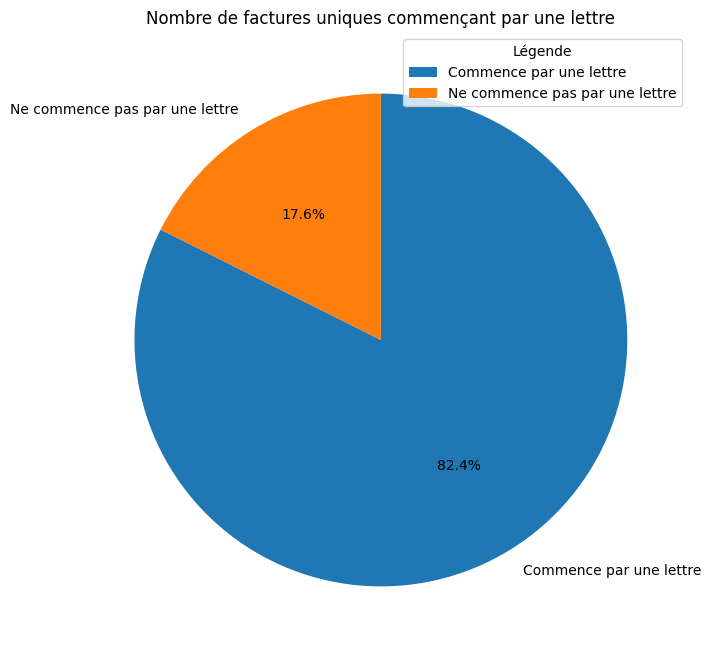

In [11]:
# Créer une nouvelle colonne pour indiquer si la facture commence par une lettre
df['InvoiceStartsWithLetter'] = df['Invoice'].str[0].str.isalpha()

# Compter le nombre de factures uniques qui commencent par une lettre et celles qui ne le font pas
invoice_counts = df.drop_duplicates(subset='Invoice')['InvoiceStartsWithLetter'].value_counts()

# Créer un graphique circulaire
plt.figure(figsize=(12, 8))

plt.pie(invoice_counts, labels=['Commence par une lettre', 'Ne commence pas par une lettre'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.title('Nombre de factures uniques commençant par une lettre')
plt.legend(title='Légende')
plt.show()

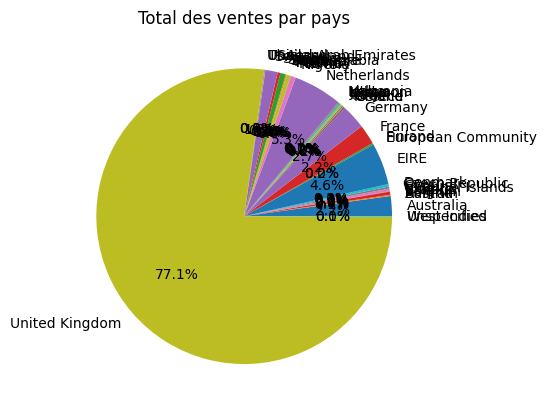

In [12]:
data = df.groupby('Country')['total_facture'].sum()
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


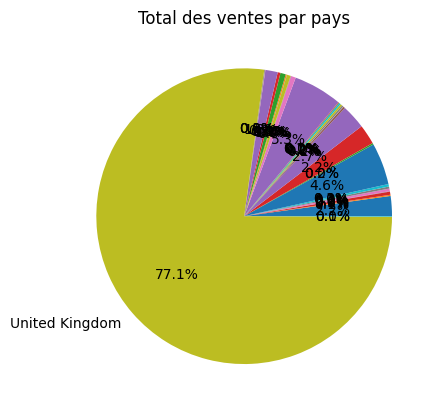

In [13]:
data = df.groupby('Country')['total_facture'].sum()
total = data.sum()
labels = [label if value / total > 0.1 else '' for label, value in data.items()]
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays')
plt.show()


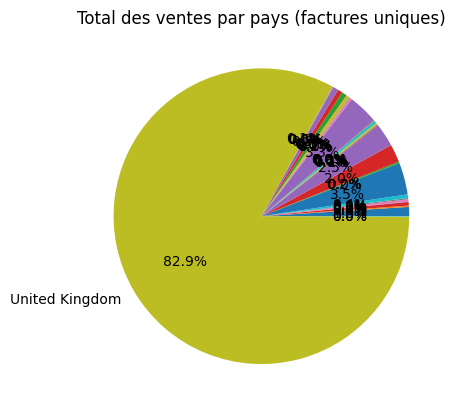

In [14]:

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum()
total = data.sum()

# Créer des étiquettes pour les pays dont la part est supérieure à 10%
labels = [label if value / total > 0.1 else '' for label, value in data.items()]

# Créer un graphique circulaire
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays (factures uniques)')
plt.show()


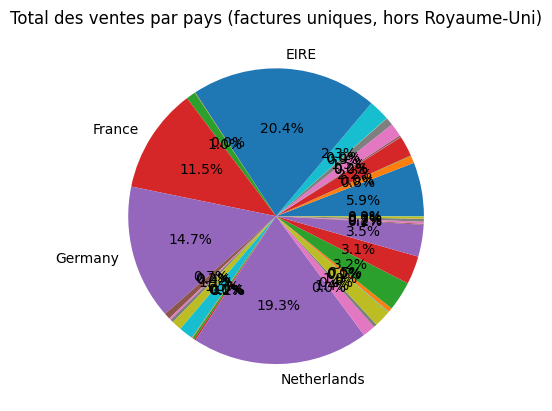

In [15]:

# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum()
total = data.sum()

# Créer des étiquettes pour les pays dont la part est supérieure à 10%
labels = [label if value / total > 0.1 else '' for label, value in data.items()]

# Créer un graphique circulaire
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni)')
plt.show()


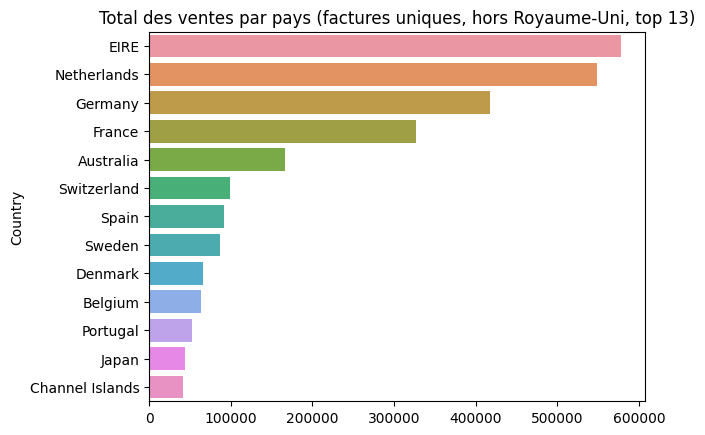

In [16]:

# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum().sort_values(ascending=False).head(13)

# Créer un graphique à barres
sns.barplot(x=data.values, y=data.index)
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni, top 13)')
plt.show()



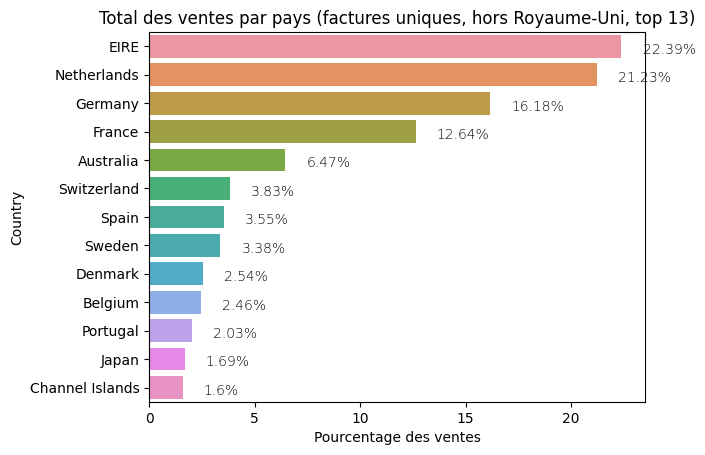

In [17]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum().sort_values(ascending=False).head(13)

# Calculer le total des montants
total = data.sum()

# Convertir les montants en pourcentage
data_percentage = data.apply(lambda x: x / total * 100)

# Créer un graphique à barres
ax = sns.barplot(x=data_percentage.values, y=data_percentage.index)
plt.title('Total des ventes par pays (factures uniques, hors Royaume-Uni, top 13)')
plt.xlabel('Pourcentage des ventes')

# Afficher les valeurs à côté des barres
for i, v in enumerate(data_percentage.values):
    ax.text(v + 1, i + .25, str(round(v, 2)) + '%', color='black', fontweight='light')

plt.show()

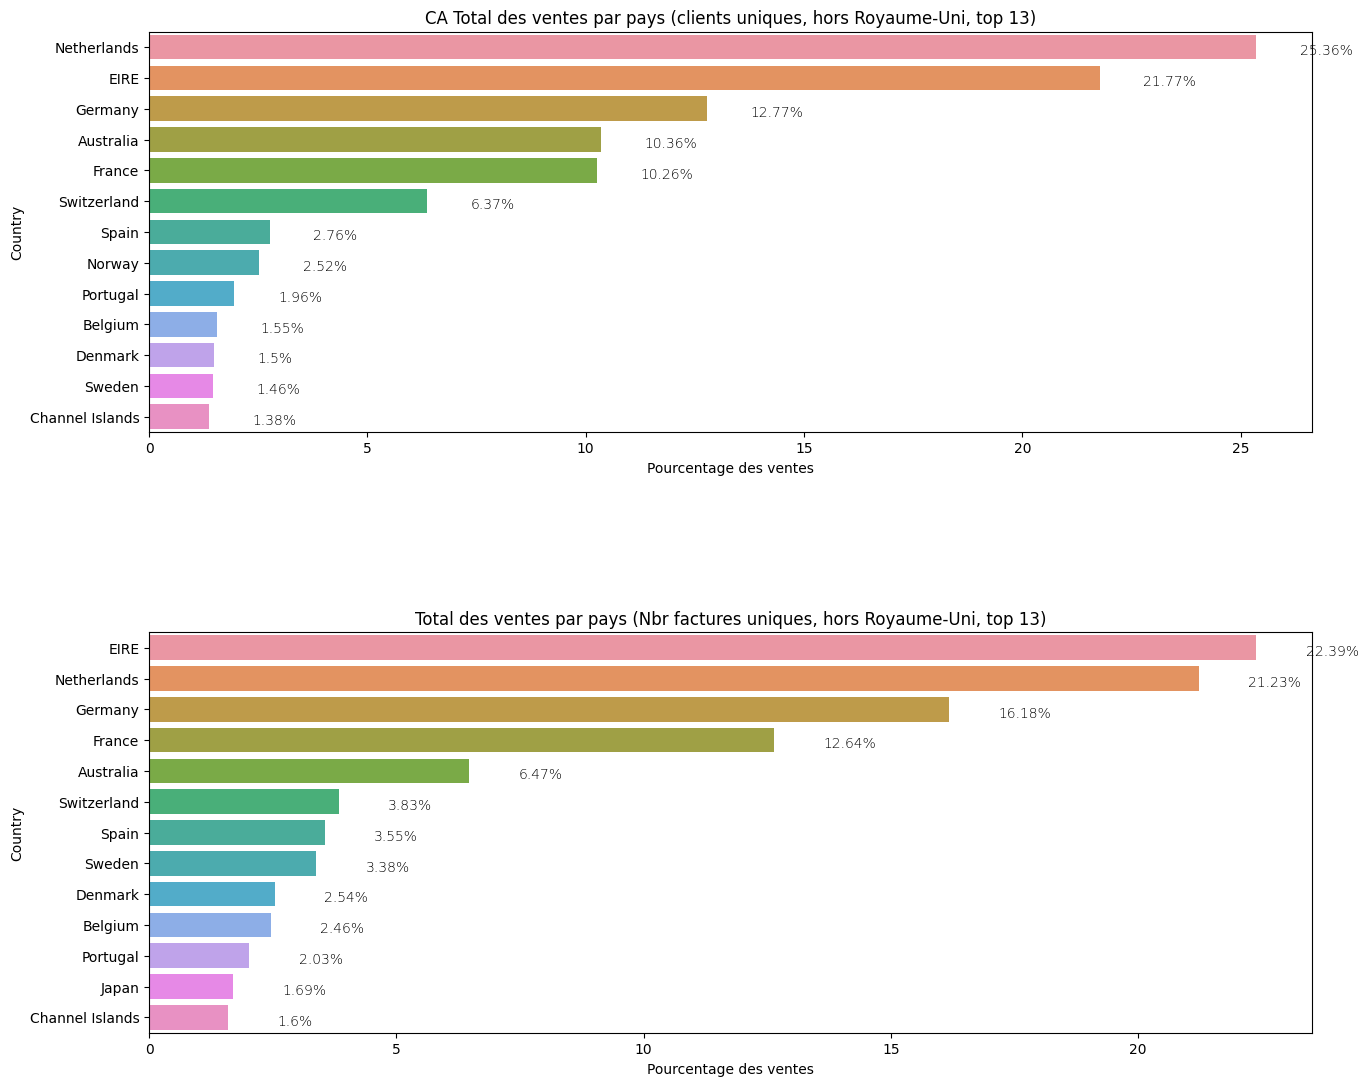

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df_filtered.drop_duplicates(subset='Customer ID')

# Grouper les données par pays et calculer la somme des montants pour les clients uniques
data_customers = df_unique_customers.groupby('Country')['Montant'].sum().sort_values(ascending=False).head(13)

# Calculer le total des montants pour les clients uniques
total_customers = data_customers.sum()

# Convertir les montants en pourcentage pour les clients uniques
data_percentage_customers = data_customers.apply(lambda x: x / total_customers * 100)

# Créer un graphique à barres pour les clients uniques
ax1 = plt.subplot(2, 1, 1)
sns.barplot(x=data_percentage_customers.values, y=data_percentage_customers.index)
plt.title('CA Total des ventes par pays (clients uniques, hors Royaume-Uni, top 13)')
plt.xlabel('Pourcentage des ventes')

# Afficher les valeurs à côté des barres pour les clients uniques
for i, v in enumerate(data_percentage_customers.values):
 ax1.text(v + 1, i + .25, str(round(v, 2)) + '%', color='black', fontweight='light')

# Grouper les données par pays et calculer la somme des montants pour les factures uniques
data_invoices = df_filtered.drop_duplicates(subset='Invoice').groupby('Country')['total_facture'].sum().sort_values(ascending=False).head(13)

# Calculer le total des montants pour les factures uniques
total_invoices = data_invoices.sum()

# Convertir les montants en pourcentage pour les factures uniques
data_percentage_invoices = data_invoices.apply(lambda x: x / total_invoices * 100)

# Créer un graphique à barres pour les factures uniques
ax2 = plt.subplot(2, 1, 2)
sns.barplot(x=data_percentage_invoices.values, y=data_percentage_invoices.index)
plt.title('Total des ventes par pays (Nbr factures uniques, hors Royaume-Uni, top 13)')
plt.xlabel('Pourcentage des ventes')

# Afficher les valeurs à côté des barres pour les factures uniques
for i, v in enumerate(data_percentage_invoices.values):
 ax2.text(v + 1, i + .25, str(round(v, 2)) + '%', color='black', fontweight='light')

# Ajuster les marges entre les sous-graphiques
plt.subplots_adjust(hspace=0.5)

# Augmenter la taille de la figure
fig = plt.gcf()
fig.set_size_inches(15, 13)

# Afficher les graphiques l'un en dessous de l'autre
plt.show()


In [19]:
# # Grouper les données par 'Country' et calculer la somme de 'Montant' pour chaque groupe
# data = df.groupby('Country')['Montant'].sum()

# # Créer un DataFrame à partir des données groupées
# data_df = pd.DataFrame({'Country': data.index, 'Total Sales': data.values})

# # Augmenter la taille de la figure
# plt.figure(figsize=(12, 6))

# # Créer un graphique à barres avec Seaborn
# sns.barplot(x='Country', y='Total Sales', data=data_df)
# plt.title('Total des ventes par pays')
# plt.xlabel('Pays')
# plt.ylabel('Total des ventes')
# plt.xticks(rotation=90)
# plt.show()

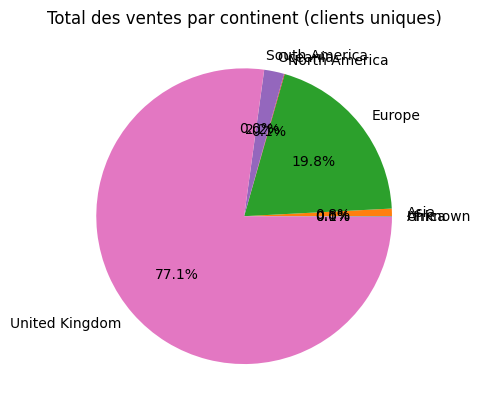

In [20]:
country_to_continent = {
'United Kingdom': 'United Kingdom',
'France': 'Europe',
'USA': 'North America',
'Belgium': 'Europe',
'Australia': 'Oceania',
'EIRE': 'Europe',
'Germany': 'Europe',
'Portugal': 'Europe',
'Japan': 'Asia',
'Denmark': 'Europe',
'Netherlands': 'Europe',
'Poland': 'Europe',
'Spain': 'Europe',
'Channel Islands': 'Europe',
'Italy': 'Europe',
'Cyprus': 'Asia',
'Greece': 'Europe',
'Norway': 'Europe',
'Austria': 'Europe',
'Sweden': 'Europe',
'United Arab Emirates': 'Asia',
'Finland': 'Europe',
'Switzerland': 'Europe',
'Unspecified': 'Unknown',
'Nigeria': 'Africa',
'Malta': 'Europe',
'RSA': 'Africa',
'Singapore': 'Asia',
'Bahrain': 'Asia',
'Thailand': 'Asia',
'Israel': 'Asia',
'Lithuania': 'Europe',
'West Indies': 'North America',
'Korea': 'Asia',
'Brazil': 'South America',
'Canada': 'North America',
'Iceland': 'Europe',
'Lebanon': 'Asia',
'Saudi Arabia': 'Asia',
'Czech Republic': 'Europe',
'European Community': 'Europe'
}

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df.drop_duplicates(subset='Customer ID')

# Grouper les données par continent et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Continent')['Montant'].sum()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par continent (clients uniques)')
plt.show()


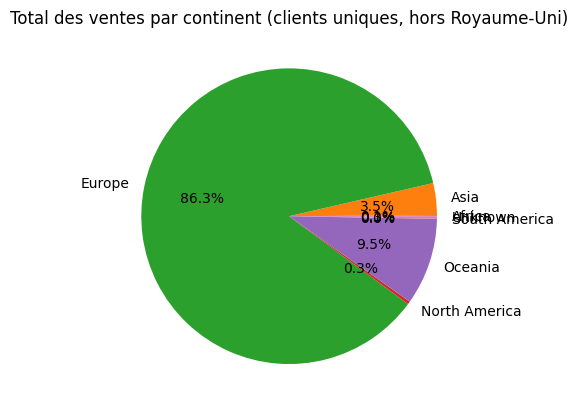

In [21]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df_filtered.drop_duplicates(subset='Customer ID')

# Grouper les données par continent et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Continent')['Montant'].sum()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par continent (clients uniques, hors Royaume-Uni)')
plt.show()

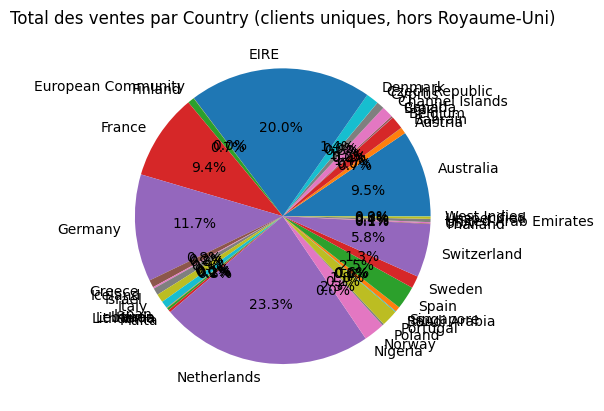

In [22]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df_filtered.drop_duplicates(subset='Customer ID')

# Grouper les données par continent et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Country')['Montant'].sum()

# Créer un graphique circulaire
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title('Total des ventes par Country (clients uniques, hors Royaume-Uni)')
plt.show()

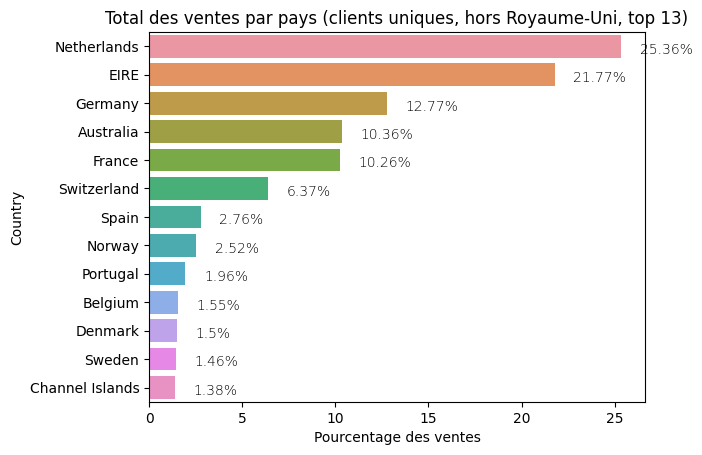

In [23]:
# Filtrer les données pour exclure le Royaume-Uni
df_filtered = df[df['Country'] != 'United Kingdom']

# Filtrer les données pour ne garder que les clients uniques
df_unique_customers = df_filtered.drop_duplicates(subset='Customer ID')

# Grouper les données par pays et calculer la somme des montants pour les clients uniques
data = df_unique_customers.groupby('Country')['Montant'].sum().sort_values(ascending=False).head(13)

# Calculer le total des montants
total = data.sum()

# Convertir les montants en pourcentage
data_percentage = data.apply(lambda x: x / total * 100)

# Créer un graphique à barres

ax = sns.barplot(x=data_percentage.values, y=data_percentage.index)
plt.title('Total des ventes par pays (clients uniques, hors Royaume-Uni, top 13)')
plt.xlabel('Pourcentage des ventes')

# Afficher les valeurs à côté des barres
for i, v in enumerate(data_percentage.values):
    ax.text(v + 1, i + .25, str(round(v, 2)) + '%', color='black', fontweight='light')

plt.show()

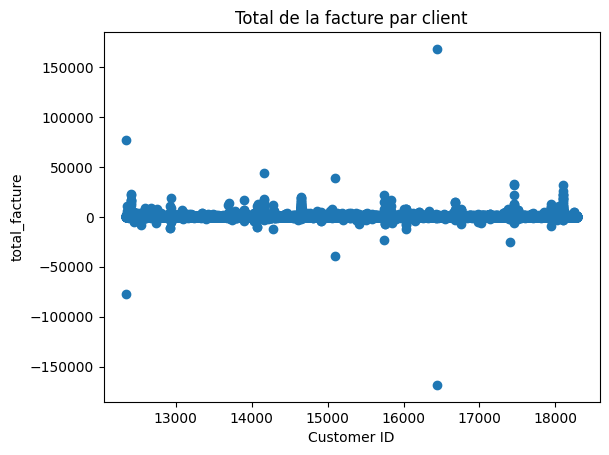

In [24]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_facture'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total de la facture par client') # Ajout d'un titre

plt.show()

In [25]:
# df[df['total_facture']  >40000]


In [26]:
# df[df['total_facture'] < -20000]


In [27]:
# df_client = df.loc[df['Customer ID'] == 12346.0    ]       
# df_client
# 15098.0	
# C556445	
# 556444

#####
# 12346.0	
# 541431
# C541433	

#####
# 16446.0
# 581483
# C581484

#####  '540815','540818','C550456'


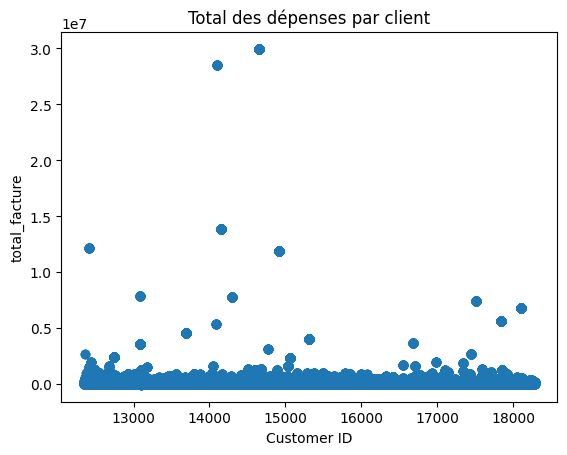

In [28]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['Montant'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total des dépenses par client') # Ajout d'un titre

plt.show()

In [29]:
mask = ~df.duplicated(subset='Customer ID') & (df['Montant'] > 3000000)
df_filtered = df[mask].sort_values(by='Montant', ascending=False)

df_filtered 
# 29 957 131.19

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter
4547,489889,22271,FELTCRAFT DOLL ROSIE,96,2009-12-02,2009,12,2.55,14646.0,Netherlands,244.80,4734.24,29957131.19,5.0,84.0,75.0,0.0,9.0,3.0,12.0,Europe,False
648440,564764,16207B,PINK HEART RED HANDBAG,1,2011-08-30,2011,8,2.46,14096.0,United Kingdom,2.46,21.84,28532583.09,0.0,0.0,34.0,0.0,0.0,17.0,17.0,United Kingdom,False
994,489546,84050,PINK HEART SHAPE EGG FRYING PAN,6,2009-12-01,2009,12,1.65,14156.0,EIRE,9.90,584.50,13873499.47,10.0,128.0,64.0,3.0,33.0,10.0,46.0,Europe,False
199042,513987,21917,SET 12 KIDS WHITE CHALK STICKS,24,2010-06-30,2010,6,0.42,12415.0,Australia,10.08,2326.74,12129731.00,0.0,7.0,26.0,0.0,0.0,5.0,5.0,Oceania,False
437,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01,2009,12,0.75,14911.0,EIRE,9.00,733.63,11931038.60,16.0,262.0,232.0,7.0,61.0,44.0,112.0,Europe,False
14032,490937,22273,FELTCRAFT DOLL MOLLY,24,2009-12-08,2009,12,2.95,13081.0,United Kingdom,70.80,2285.58,7890866.30,1.0,24.0,19.0,0.0,6.0,10.0,16.0,United Kingdom,False
19356,491612,16168S,FUNKY MONKEY GIFT BAG SMALL,216,2009-12-11,2009,12,0.09,14298.0,United Kingdom,19.44,849.94,7788613.81,2.0,42.0,40.0,0.0,1.0,1.0,2.0,United Kingdom,False
2595,489702,22086,PAPER CHAIN KIT 50'S CHRISTMAS,280,2009-12-02,2009,12,2.55,17511.0,United Kingdom,714.00,3108.64,7427754.43,2.0,41.0,42.0,0.0,11.0,14.0,25.0,United Kingdom,False
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01,2009,12,0.98,18102.0,United Kingdom,27.44,2286.24,6778621.37,9.0,86.0,58.0,0.0,6.0,2.0,8.0,United Kingdom,False
4272,489875,79160,HEART SHAPE WIRELESS DOORBELL,11,2009-12-02,2009,12,2.10,17841.0,United Kingdom,23.10,530.76,5681697.88,9.0,119.0,161.0,1.0,34.0,43.0,78.0,United Kingdom,False


In [30]:
to_remove = ['C556445', '556444', '541431', 'C541433', '581483', 'C581484', 'C512770','540815','540818','C550456']  #  attention C512770 c'est 1 seul ligne manual
df = df[~df['Invoice'].isin(to_remove)]


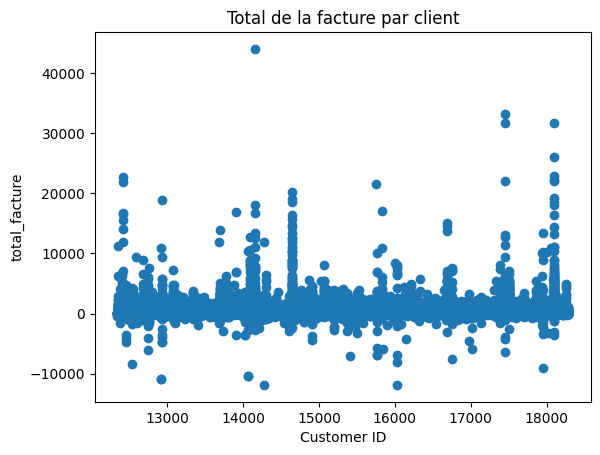

In [31]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.scatter(df_filtered['Customer ID'], df_filtered['total_facture'])
plt.xlabel('Customer ID')
plt.ylabel('total_facture')
plt.title('Total de la facture par client') # Ajout d'un titre

plt.show()

pour ne conserver que les lignes où la valeur de la colonne ‘total_client_années’ est inférieure ou égale à 5000000. 

In [32]:
# df = df[df['total_client_années'] <= 5000000]


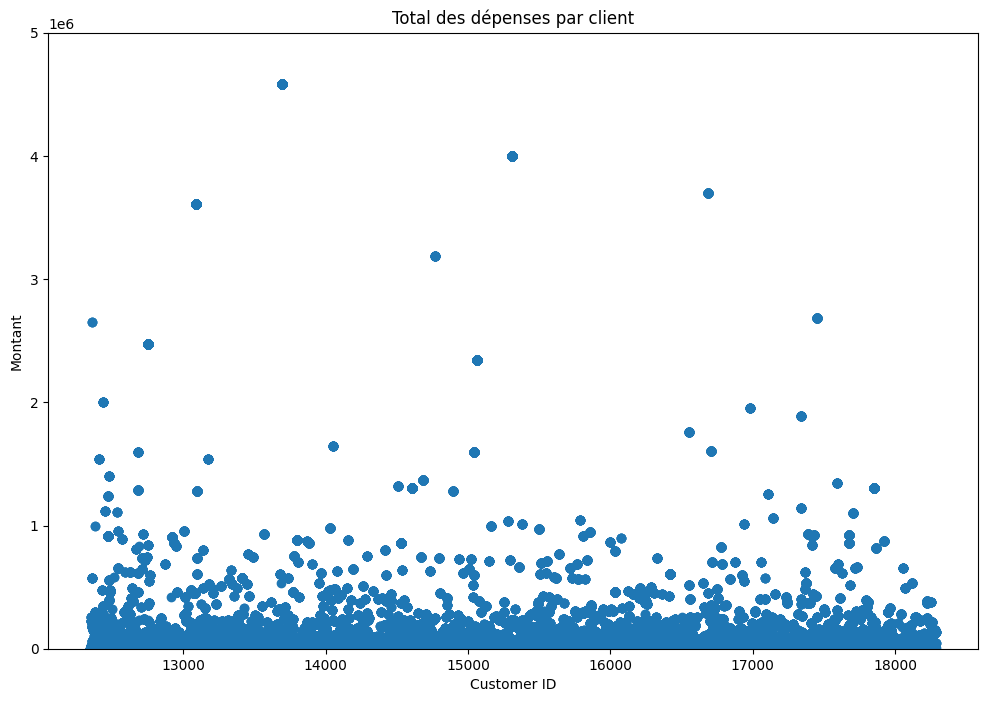

In [33]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Créez le scatter plot
plt.figure(figsize=(12, 8))

plt.scatter(df_filtered['Customer ID'], df_filtered['Montant'])

plt.xlabel('Customer ID')
plt.ylabel('Montant')
plt.title('Total des dépenses par client') # Ajout d'un titre

# Effectuez un zoom sur la partie supérieure droite du graphique
plt.ylim(0, 5000000)


plt.show()

In [34]:
# # Créez un masque pour supprimer les doublons de 'Customer ID'
# mask = df.duplicated(subset=['Customer ID'], keep='first')
# df_filtered = df[~mask]

# # Calculez le nombre de tranches
# max_value = df_filtered['Montant'].max()
# n_bins = int(max_value / 100) + 1

# # Calculez les limites des tranches
# bin_edges = np.arange(0, n_bins * 500, 500)

# # Calculez le nombre de 'Customer ID' uniques par tranche
# df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
# n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# # Créez le bar plot
# plt.figure(figsize=(12, 8))
# n_unique_per_bin.plot(kind='bar')
# plt.xlabel('Montant')
# plt.ylabel('Nombre de Customer ID uniques')
# plt.title('Nombre de Customer ID uniques par tranche de total_client_années')

# plt.show()



C:\Users\impej\AppData\Local\Temp\ipykernel_6776\537746103.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)


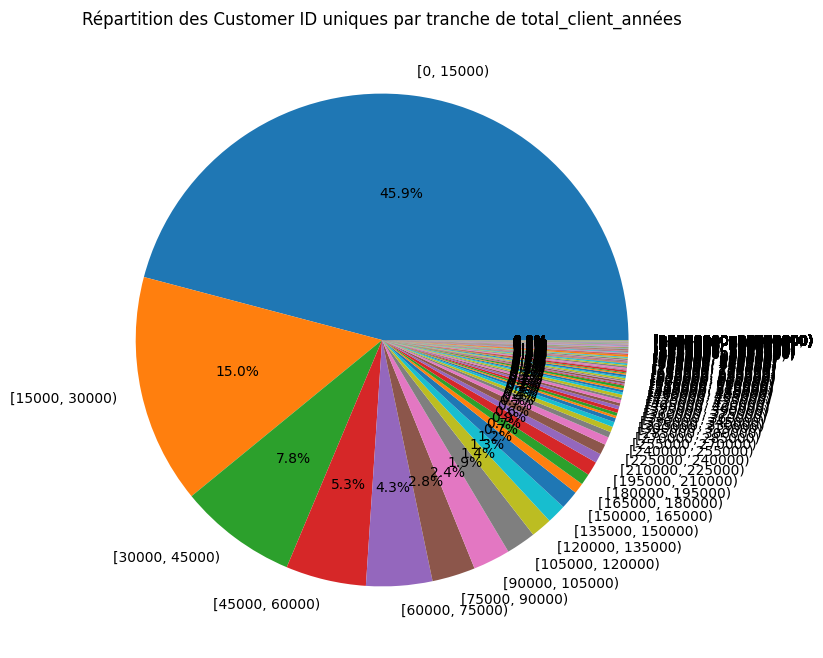

In [35]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Calculez le nombre de tranches
max_value = df_filtered['Montant'].max()
n_bins = int(max_value / 15000) + 1

# Calculez les limites des tranches
bin_edges = np.arange(0, n_bins * 15000, 15000)

# Calculez le nombre de 'Customer ID' uniques par tranche
df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_bin / n_unique_per_bin.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Customer ID uniques par tranche de total_client_années')

plt.show()


C:\Users\impej\AppData\Local\Temp\ipykernel_6776\224287086.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)


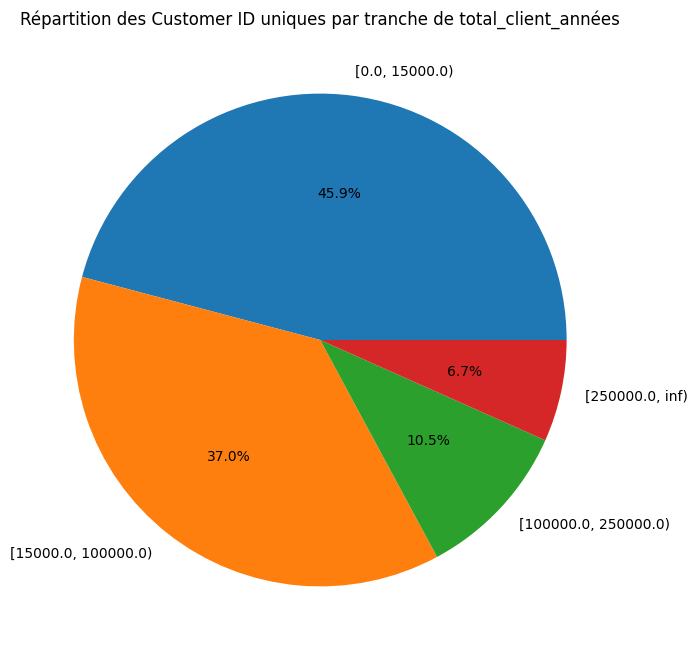

In [36]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Définissez les limites des tranches
bin_edges = [0, 15000, 100000, 250000, np.inf]

# Calculez le nombre de 'Customer ID' uniques par tranche
df_filtered['bin'] = pd.cut(df_filtered['Montant'], bins=bin_edges, right=False)
n_unique_per_bin = df_filtered.groupby('bin')['Customer ID'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_bin / n_unique_per_bin.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Customer ID uniques par tranche de total_client_années')

plt.show()


In [37]:
df[df['StockCode'].astype(str).str.startswith('T')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter
21779,491725,TEST001,This is a test product.,10,2009-12-14,2009,12,4.5,12346.0,United Kingdom,45.0,45.0,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
22035,491742,TEST001,This is a test product.,5,2009-12-14,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
22038,491744,TEST001,This is a test product.,5,2009-12-14,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
28943,492718,TEST001,This is a test product.,5,2009-12-18,2009,12,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
28955,492722,TEST002,This is a test product.,1,2009-12-18,2009,12,1.0,12346.0,United Kingdom,1.0,1.0,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
31760,493410,TEST001,This is a test product.,5,2010-01-04,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
31762,493412,TEST001,This is a test product.,5,2010-01-04,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
38451,494450,TEST001,This is a test product.,5,2010-01-14,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
45590,495295,TEST001,This is a test product.,5,2010-01-22,2010,1,4.5,12346.0,United Kingdom,22.5,22.5,-351.76,5.0,10.0,2.0,0.0,4.0,1.0,5.0,United Kingdom,False
63878,497819,TEST001,This is a test product.,5,2010-02-12,2010,2,0.0,14103.0,United Kingdom,0.0,0.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,False


In [38]:
# df = df[~df['StockCode'].astype(str).str.startswith('T')]


In [39]:
# # Définissez les limites des tranches
# bin_edges = [0, 15000, 100000, 250000, np.inf]

# # Créez la colonne 'niveau_achat'
# df['niveau_achat'] = pd.cut(df['total_client_années'], bins=bin_edges, right=False)

# Définissez les limites des tranches
bin_edges = [0, 15000, 100000, 250000, np.inf]

# Définissez les labels pour les tranches
bin_labels = [1, 2, 3, 4]

# Créez la colonne 'niveau_achat'
df['niveau_achat'] = pd.cut(df['Montant'], bins=bin_edges, labels=bin_labels, right=False)


In [40]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter,niveau_achat
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1


## R de rfm   récence

In [41]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['LastInvoiceDate'] = df.groupby('Customer ID')['InvoiceDate'].transform('max')
df['Recency'] = df['InvoiceDate'].max() - df['LastInvoiceDate']
df['Recency'] = df['Recency'].dt.days
df = df.drop(columns=['LastInvoiceDate'])


In [42]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter,niveau_achat,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0


##  Créer la colonne "Frequency"


In [43]:
df['Frequency'] = df['nombre_commande_client_années_2009'] + df['nombre_commande_client_années_2010'] + df['nombre_commande_client_années_2011']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0


In [44]:
df['Frequency_reel'] = df['nombre_commande_client_années_2009'] + df['nombre_commande_client_années_2010'] + df['nombre_commande_client_années_2011'] - df['nombre_commande_client_années_annulées_2009'] - df['nombre_commande_client_années_annulées_2010'] - df['nombre_commande_client_années_annulées_2011']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0


In [45]:
unique_invoices = df[df['Customer ID'] == 12680.0]['Invoice'].nunique()
print(f'Le client avec l\'ID 13085.0 a {unique_invoices} factures uniques.')


Le client avec l'ID 13085.0 a 4 factures uniques.


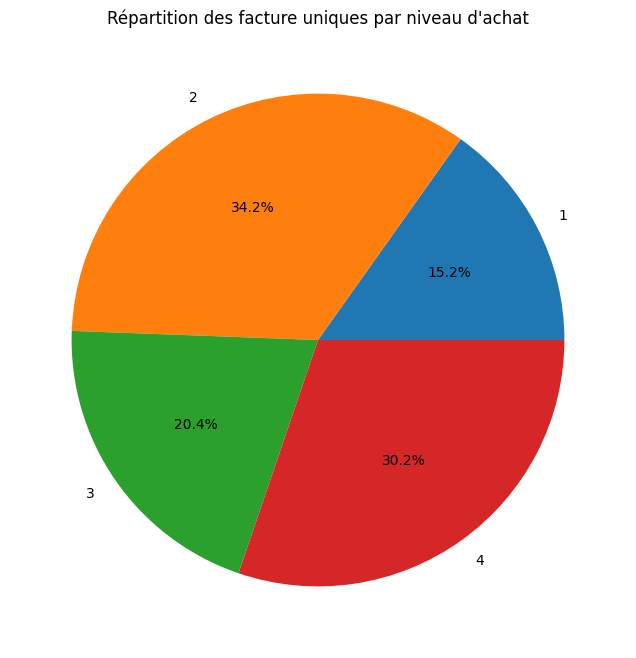

In [46]:
# Créez un masque pour supprimer les doublons de 'Invoice'
mask = df.duplicated(subset=['Invoice'], keep='first')
df_filtered = df[~mask]

# Calculez le nombre d' 'Invoice' uniques par niveau d'achat
n_unique_per_level = df_filtered.groupby('niveau_achat')['Invoice'].nunique()

# Calculez les pourcentages
percentages = n_unique_per_level / n_unique_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des facture uniques par niveau d\'achat')

plt.show()


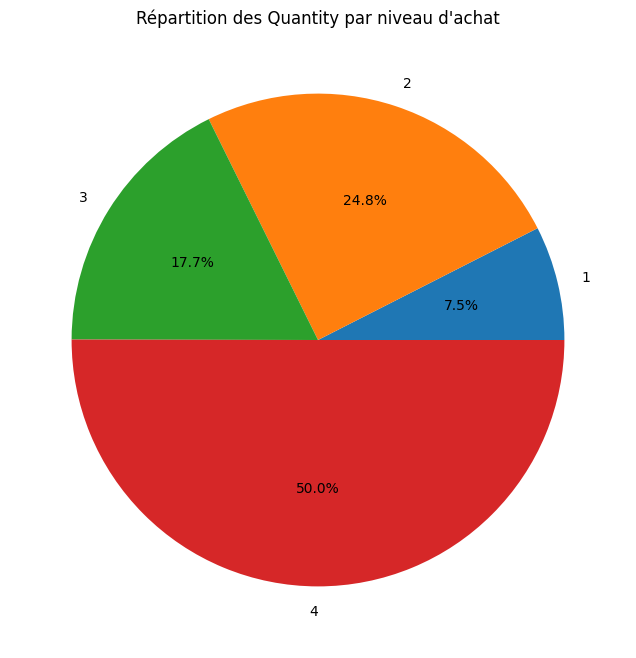

In [47]:
# Calculez la somme des valeurs de 'Quantity' par niveau d'achat
quantity_per_level = df.groupby('niveau_achat')['Quantity'].sum()

# Calculez les pourcentages
percentages = quantity_per_level / quantity_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des Quantity par niveau d\'achat')

plt.show()


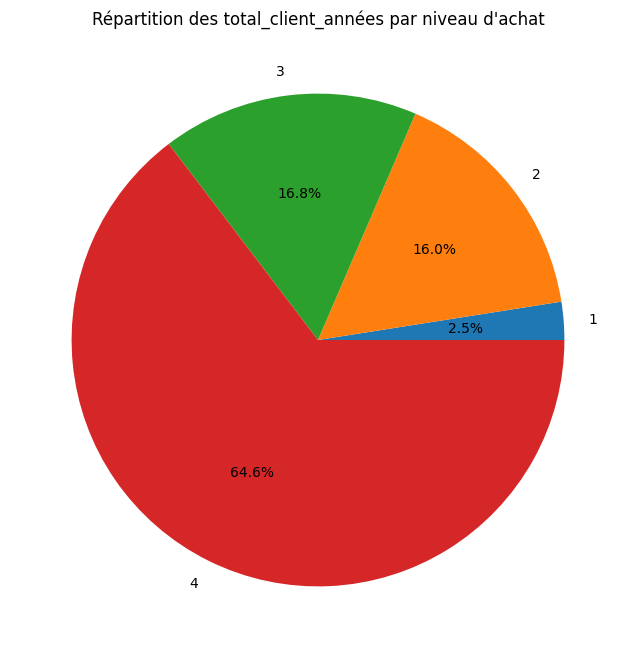

In [48]:
# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Calculez la somme des valeurs de 'total_client_années' par niveau d'achat
total_per_level = df_filtered.groupby('niveau_achat')['Montant'].sum()

# Calculez les pourcentages
percentages = total_per_level / total_per_level.sum() * 100

# Créez le graphique circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Répartition des total_client_années par niveau d\'achat')

plt.show()


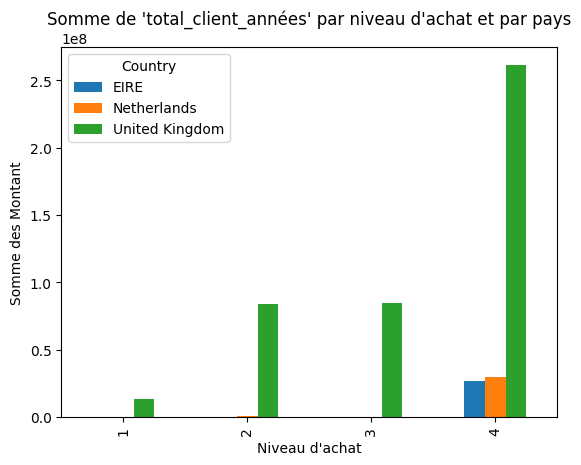

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Créez un masque pour supprimer les doublons de 'Customer ID'
mask = df.duplicated(subset=['Customer ID'], keep='first')
df_filtered = df[~mask]

# Filtrer les données pour inclure uniquement les pays spécifiés
df_filtered = df_filtered[df_filtered['Country'].isin(['EIRE', 'Netherlands', 'United Kingdom'])]

# Grouper les données par 'niveau_achat' et 'Country'
grouped = df_filtered.groupby(['niveau_achat', 'Country'])['Montant'].sum().unstack()

# Créer un graphique à barres
grouped.plot(kind='bar')
plt.title('Somme de \'total_client_années\' par niveau d\'achat et par pays')
plt.xlabel('Niveau d\'achat')
plt.ylabel('Somme des Montant')
plt.show()


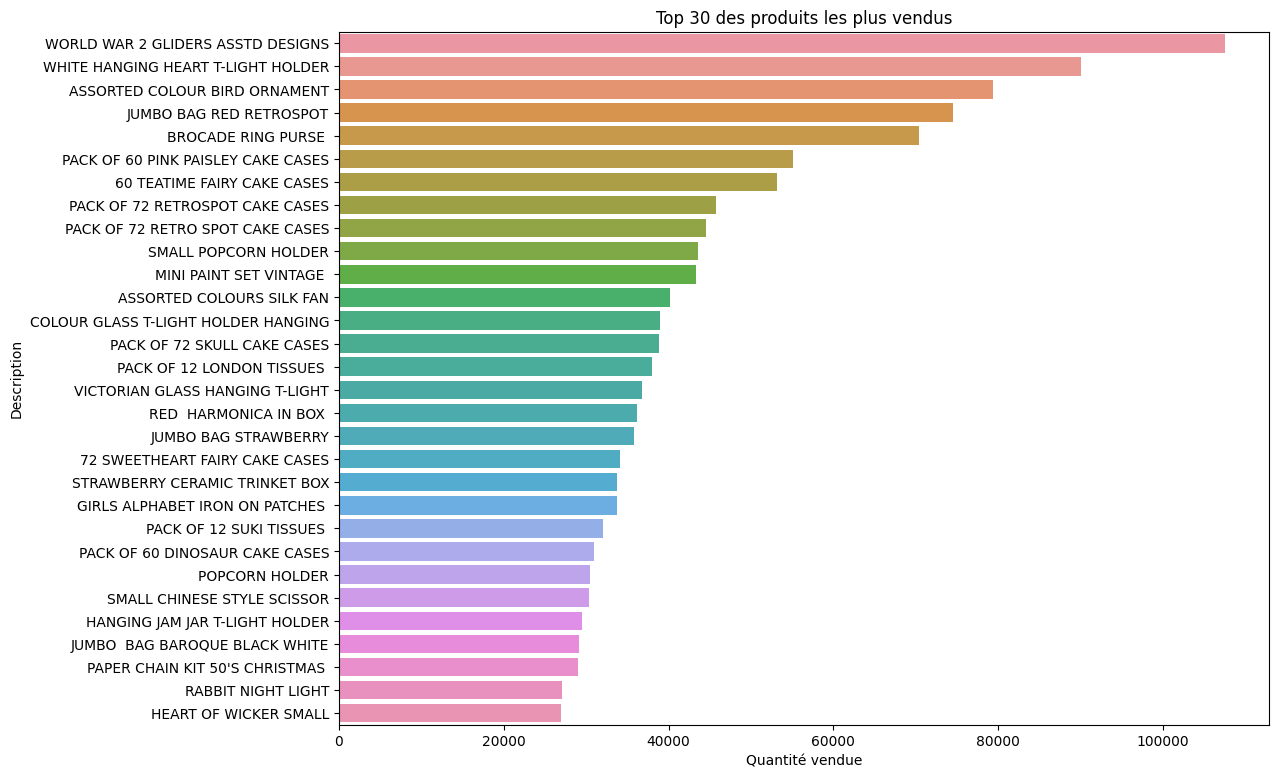

In [50]:


# Grouper les données par 'Description' et calculer la somme de 'Quantity' pour chaque groupe
grouped = df.groupby('Description')['Quantity'].sum()

# Trier les données en ordre décroissant et sélectionner les 10 premières lignes
top_10 = grouped.sort_values(ascending=False).head(30)

# Créer un DataFrame à partir des données de top_10
top_10_df = pd.DataFrame({'Description': top_10.index, 'Quantity': top_10.values})

# Augmenter la taille de la figure
plt.figure(figsize=(12, 9))


# Créer un graphique à barres horizontales avec Seaborn
sns.barplot(x='Quantity', y='Description', data=top_10_df)
plt.title('Top 30 des produits les plus vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Description')
plt.show()


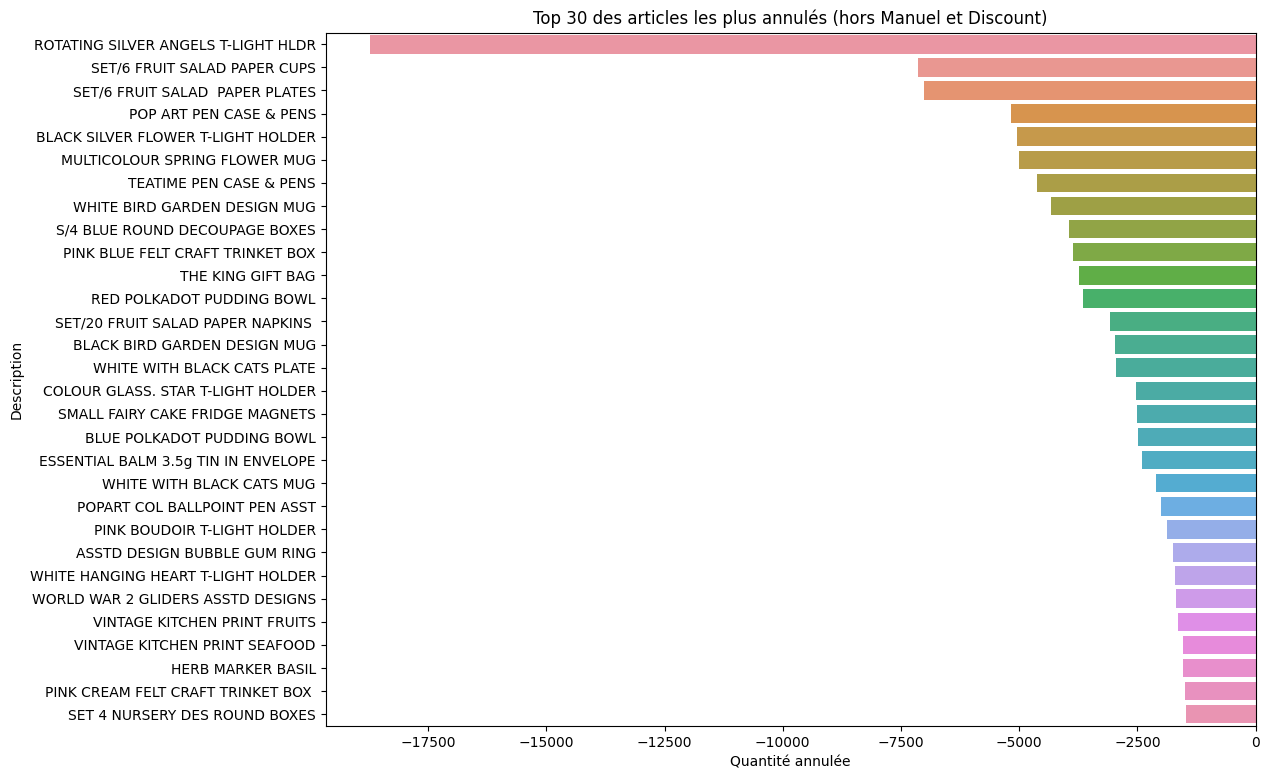

In [51]:
# Filtrer les lignes du DataFrame où la colonne 'Invoice' commence par 'C', où la colonne 'Quantity' est négative et où la colonne 'Description' n'est ni 'Manuel' ni 'Discount'
cancelled = df[df['Invoice'].str.startswith('C') & (df['Quantity'] < 0) & ~(df['Description'].isin(['Manual', 'Discount']))]

# Grouper les données par 'Description' et calculer la somme de 'Quantity' pour chaque groupe
grouped = cancelled.groupby('Description')['Quantity'].sum()

# Trier les données en ordre croissant (puisque les quantités sont négatives) et sélectionner les 30 premières lignes
top_30 = grouped.sort_values().head(30)

# Créer un DataFrame à partir des données de top_30
top_30_df = pd.DataFrame({'Description': top_30.index, 'Quantity': top_30.values})

# Augmenter la taille de la figure
plt.figure(figsize=(12, 9))

# Créer un graphique à barres horizontales avec Seaborn
sns.barplot(x='Quantity', y='Description', data=top_30_df)
plt.title('Top 30 des articles les plus annulés (hors Manuel et Discount)')
plt.xlabel('Quantité annulée')
plt.ylabel('Description')
plt.show()


In [52]:
# Filtrer les lignes du DataFrame où la colonne 'Invoice' commence par 'C', où la colonne 'Quantity' est négative et où la colonne 'Description' n'est ni 'Manuel' ni 'Discount'
cancelled = df[df['Invoice'].str.startswith('C') & (df['Quantity'] < 0) & ~(df['Description'].isin(['Manual', 'Discount']))]

# Grouper les données par 'Description' et calculer la somme de 'Quantity' pour chaque groupe
grouped = cancelled.groupby('Description')['Quantity'].sum()

# Trier les données en ordre croissant (puisque les quantités sont négatives) et sélectionner les 30 premières lignes
top_30 = grouped.sort_values().head(30)

# Créer un DataFrame à partir des données de top_30
top_30_df = pd.DataFrame({'Description': top_30.index, 'Quantity': top_30.values})

# Afficher le DataFrame
display(top_30_df)


,Description,Quantity
0,ROTATING SILVER ANGELS T-LIGHT HLDR,-18730
1,SET/6 FRUIT SALAD PAPER CUPS,-7140
2,SET/6 FRUIT SALAD PAPER PLATES,-7008
3,POP ART PEN CASE & PENS,-5184
4,BLACK SILVER FLOWER T-LIGHT HOLDER,-5040
5,MULTICOLOUR SPRING FLOWER MUG,-4996
6,TEATIME PEN CASE & PENS,-4632
7,WHITE BIRD GARDEN DESIGN MUG,-4320
8,S/4 BLUE ROUND DECOUPAGE BOXES,-3940
9,PINK BLUE FELT CRAFT TRINKET BOX,-3867


In [53]:
# Liste des descriptions à inclure
descriptions = [
    'ROTATING SILVER ANGELS T-LIGHT HLDR',
    'SET/6 FRUIT SALAD PAPER CUPS',
    'SET/6 FRUIT SALAD PAPER PLATES',
    'POP ART PEN CASE & PENS',
    'BLACK SILVER FLOWER T-LIGHT HOLDER',
    'MULTICOLOUR SPRING FLOWER MUG',
    'TEATIME PEN CASE & PENS',
    'WHITE BIRD GARDEN DESIGN MUG',
    'S/4 BLUE ROUND DECOUPAGE BOXES',
    'PINK BLUE FELT CRAFT TRINKET BOX',
    'THE KING GIFT BAG',
    'RED POLKADOT PUDDING BOWL',
    'SET/20 FRUIT SALAD PAPER NAPKINS',
    'BLACK BIRD GARDEN DESIGN MUG',
    'WHITE WITH BLACK CATS PLATE',
    'COLOUR GLASS. STAR T-LIGHT HOLDER',
    'SMALL FAIRY CAKE FRIDGE MAGNETS',
    'BLUE POLKADOT PUDDING BOWL',
    'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
    'WHITE WITH BLACK CATS MUG',
    'POPART COL BALLPOINT PEN ASST',
    'PINK BOUDOIR T-LIGHT HOLDER',
    'ASSTD DESIGN BUBBLE GUM RING',
    'WHITE HANGING HEART T-LIGHT HOLDER',
    'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
    'VINTAGE KITCHEN PRINT FRUITS',
    'VINTAGE KITCHEN PRINT SEAFOOD',
    'HERB MARKER BASIL',
    'PINK CREAM FELT CRAFT TRINKET BOX',
    'SET 4 NURSERY DES ROUND BOXES'
]

# Filtrer les lignes du DataFrame où la colonne 'Invoice' ne commence pas par 'C', où la colonne 'Quantity' est positive et où la colonne 'Description' est dans la liste des descriptions
sold = df[~df['Invoice'].str.startswith('C') & (df['Quantity'] > 0) & df['Description'].isin(descriptions)]

# Grouper les données par 'Description' et calculer la somme de 'Quantity' pour chaque groupe
grouped = sold.groupby('Description')['Quantity'].sum()

# Créer un DataFrame à partir des données de grouped
grouped_df = pd.DataFrame({'Description': grouped.index, 'Quantity': grouped.values})

# Afficher le DataFrame
display(grouped_df)


,Description,Quantity
0,ASSTD DESIGN BUBBLE GUM RING,22470
1,BLACK BIRD GARDEN DESIGN MUG,6149
2,BLACK SILVER FLOWER T-LIGHT HOLDER,11512
3,BLUE POLKADOT PUDDING BOWL,2573
4,COLOUR GLASS. STAR T-LIGHT HOLDER,14492
5,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,11361
6,HERB MARKER BASIL,3411
7,MULTICOLOUR SPRING FLOWER MUG,13093
8,PINK BLUE FELT CRAFT TRINKET BOX,20859
9,PINK BOUDOIR T-LIGHT HOLDER,4203


In [54]:
# DataFrame avec les quantités annulées pour chaque article
cancelled_df = pd.DataFrame({
    'Description': top_30_df['Description'],
    'Quantity': top_30_df['Quantity']
})

# DataFrame avec les quantités commandées pour chaque article
sold_df = pd.DataFrame({
    'Description': grouped_df['Description'],
    'Quantity': grouped_df['Quantity']
})

# Fusionner les deux DataFrames en utilisant la colonne 'Description' comme clé
merged_df = pd.merge(cancelled_df, sold_df, on='Description', suffixes=('_cancelled', '_sold'))

# Calculer le pourcentage de retours pour chaque article
merged_df['Return Percentage'] = abs(merged_df['Quantity_cancelled'] / merged_df['Quantity_sold'] * 100)

# Trier le DataFrame en ordre décroissant en fonction de la colonne 'Return Percentage'
merged_df = merged_df.sort_values(by='Return Percentage', ascending=False)

# Afficher le DataFrame résultant
display(merged_df)


,Description,Quantity_cancelled,Quantity_sold,Return Percentage
10,RED POLKADOT PUDDING BOWL,-3648,3711,98.302344
15,BLUE POLKADOT PUDDING BOWL,-2496,2573,97.007384
0,ROTATING SILVER ANGELS T-LIGHT HLDR,-18730,29498,63.495830
6,WHITE BIRD GARDEN DESIGN MUG,-4320,8800,49.090909
2,POP ART PEN CASE & PENS,-5184,10589,48.956464
26,SET 4 NURSERY DES ROUND BOXES,-1480,3047,48.572366
11,BLACK BIRD GARDEN DESIGN MUG,-2981,6149,48.479428
12,WHITE WITH BLACK CATS PLATE,-2952,6091,48.464948
7,S/4 BLUE ROUND DECOUPAGE BOXES,-3940,8295,47.498493
23,VINTAGE KITCHEN PRINT FRUITS,-1639,3471,47.219821


In [55]:
# Filtrer les lignes du DataFrame où la colonne 'Invoice' commence par 'C', où la colonne 'Quantity' est négative et où la colonne 'Description' n'est ni 'Manuel' ni 'Discount'
cancelled = df[df['Invoice'].str.startswith('C') & (df['Quantity'] < 0) & ~(df['Description'].isin(['Manuel', 'Discount']))]

# Grouper les données par ['Customer ID', 'Invoice'] et sélectionner la première ligne de chaque groupe
grouped = cancelled.groupby(['Customer ID', 'Invoice']).first()

# Grouper les données par 'Customer ID' et calculer la taille de chaque groupe
grouped = grouped.groupby('Customer ID').size()

# Trier les données en ordre décroissant et sélectionner les 13 premières lignes
top_13_cancelled = grouped.sort_values(ascending=False).head(13)

# Créer un DataFrame à partir des données de top_13
top_13_df_cancelled = pd.DataFrame({'Customer ID': top_13_cancelled.index, 'Count': top_13_cancelled.values}) # 

# Afficher le DataFrame
display(top_13_df_cancelled)

,Customer ID,Count
0,14911.0,110
1,17841.0,76
2,14606.0,67
3,15311.0,62
4,12471.0,50
5,14156.0,46
6,13089.0,44
7,13078.0,38
8,17677.0,37
9,13093.0,33


In [56]:
# Liste des ID de clients à inclure
customer_ids = [14911.0, 17841.0, 14606.0, 15311.0, 12471.0, 14156.0, 13089.0, 13078.0, 17677.0, 13093.0, 14680.0, 12921.0, 16422.0]

# Filtrer les lignes du DataFrame où la colonne 'Customer ID' est dans la liste des ID de clients
filtered = df[df['Customer ID'].isin(customer_ids)]

# Grouper les données par ['Customer ID', 'Invoice'] et sélectionner la première ligne de chaque groupe
grouped = filtered.groupby(['Customer ID', 'Invoice']).first()

# Grouper les données par 'Customer ID' et calculer la taille de chaque groupe
grouped = grouped.groupby('Customer ID').size()

# Créer un DataFrame à partir des données de grouped
grouped_df_no_cancelled = pd.DataFrame({'Customer ID': grouped.index, 'Count': grouped.values})

# Afficher le DataFrame
display(grouped_df_no_cancelled)

,Customer ID,Count
0,12471.0,129
1,12921.0,103
2,13078.0,95
3,13089.0,247
4,13093.0,88
5,14156.0,202
6,14606.0,259
7,14680.0,87
8,14911.0,510
9,15311.0,270


In [57]:
# DataFrame avec le nombre de factures annulées pour chaque client
cancelled_df = pd.DataFrame({
    'Customer ID': top_13_df_cancelled['Customer ID'],
    'Count': top_13_df_cancelled['Count']
})

# DataFrame avec le nombre total de factures pour chaque client
total_df = pd.DataFrame({
    'Customer ID': grouped_df_no_cancelled['Customer ID'],
    'Count': grouped_df_no_cancelled['Count']
})

# Fusionner les deux DataFrames en utilisant la colonne 'Customer ID' comme clé
merged_df = pd.merge(cancelled_df, total_df, on='Customer ID', suffixes=('_cancelled', '_total'))

# Calculer le pourcentage d'annulations pour chaque client
merged_df['Cancellation Percentage'] = merged_df['Count_cancelled'] / merged_df['Count_total'] * 100

# Grouper les données par ['Customer ID', 'Country'] et sélectionner la première ligne de chaque groupe
grouped = df.groupby(['Customer ID', 'Country']).first()

# Créer un DataFrame à partir des données de grouped
grouped_df = pd.DataFrame({'Customer ID': grouped.index.get_level_values(0), 'Country': grouped.index.get_level_values(1)})

# Fusionner merged_df et grouped_df en utilisant la colonne 'Customer ID' comme clé
merged_df = pd.merge(merged_df, grouped_df, on='Customer ID')


# Trier le DataFrame en ordre décroissant en fonction de la colonne 'Return Percentage'
merged_df = merged_df.sort_values(by='Cancellation Percentage', ascending=False)

# Afficher le DataFrame résultant
display(merged_df)


,Customer ID,Count_cancelled,Count_total,Cancellation Percentage,Country
8,17677.0,37,91,40.659341,United Kingdom
7,13078.0,38,95,40.000000,United Kingdom
4,12471.0,50,129,38.759690,Germany
9,13093.0,33,88,37.500000,United Kingdom
10,14680.0,29,87,33.333333,United Kingdom
11,12921.0,29,103,28.155340,United Kingdom
1,17841.0,76,289,26.297578,United Kingdom
2,14606.0,67,259,25.868726,United Kingdom
3,15311.0,62,270,22.962963,United Kingdom
5,14156.0,46,202,22.772277,EIRE


In [58]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0


In [59]:
df = df.drop('Description', axis=1)
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,Montant,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,InvoiceStartsWithLetter,niveau_achat,Recency,Frequency,Frequency_reel
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,27639.60,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,False,2,157,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,13193.46,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,False,1,0,4.0,4.0


In [60]:
df = df.reindex(columns=['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Country', 'Total', 'total_facture',
       'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011','TT_annuler' ,'Continent',
       'niveau_achat', 'Recency', 'Frequency', 'Frequency_reel', 'Montant'])
df

,Invoice,StockCode,Quantity,InvoiceDate,year,month,Price,Customer ID,Country,Total,total_facture,nombre_commande_client_années_2009,nombre_commande_client_années_2010,nombre_commande_client_années_2011,nombre_commande_client_années_annulées_2009,nombre_commande_client_années_annulées_2010,nombre_commande_client_années_annulées_2011,TT_annuler,Continent,niveau_achat,Recency,Frequency,Frequency_reel,Montant
0,489434,85048,12,2009-12-01,2009,12,6.95,13085.0,United Kingdom,83.40,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,2,157,10.0,8.0,27639.60
1,489434,79323P,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,2,157,10.0,8.0,27639.60
2,489434,79323W,12,2009-12-01,2009,12,6.75,13085.0,United Kingdom,81.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,2,157,10.0,8.0,27639.60
3,489434,22041,48,2009-12-01,2009,12,2.10,13085.0,United Kingdom,100.80,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,2,157,10.0,8.0,27639.60
4,489434,21232,24,2009-12-01,2009,12,1.25,13085.0,United Kingdom,30.00,505.30,4.0,3.0,3.0,0.0,1.0,1.0,2.0,United Kingdom,2,157,10.0,8.0,27639.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824359,581587,22899,6,2011-12-09,2011,12,2.10,12680.0,France,12.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46
824360,581587,23254,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46
824361,581587,23255,4,2011-12-09,2011,12,4.15,12680.0,France,16.60,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46
824362,581587,22138,3,2011-12-09,2011,12,4.95,12680.0,France,14.85,267.45,0.0,0.0,4.0,0.0,0.0,0.0,0.0,Europe,1,0,4.0,4.0,13193.46


### création du nouveau CSV

In [61]:
df.to_csv("data/gold.csv" , index=False)   

In [62]:
print(df.columns)


Index(['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'year', 'month',
       'Price', 'Customer ID', 'Country', 'Total', 'total_facture',
       'nombre_commande_client_années_2009',
       'nombre_commande_client_années_2010',
       'nombre_commande_client_années_2011',
       'nombre_commande_client_années_annulées_2009',
       'nombre_commande_client_années_annulées_2010',
       'nombre_commande_client_années_annulées_2011', 'TT_annuler',
       'Continent', 'niveau_achat', 'Recency', 'Frequency', 'Frequency_reel',
       'Montant'],
      dtype='object')


C:\Users\impej\AppData\Local\Temp\ipykernel_6776\3624828837.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_trend = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum()['Total']


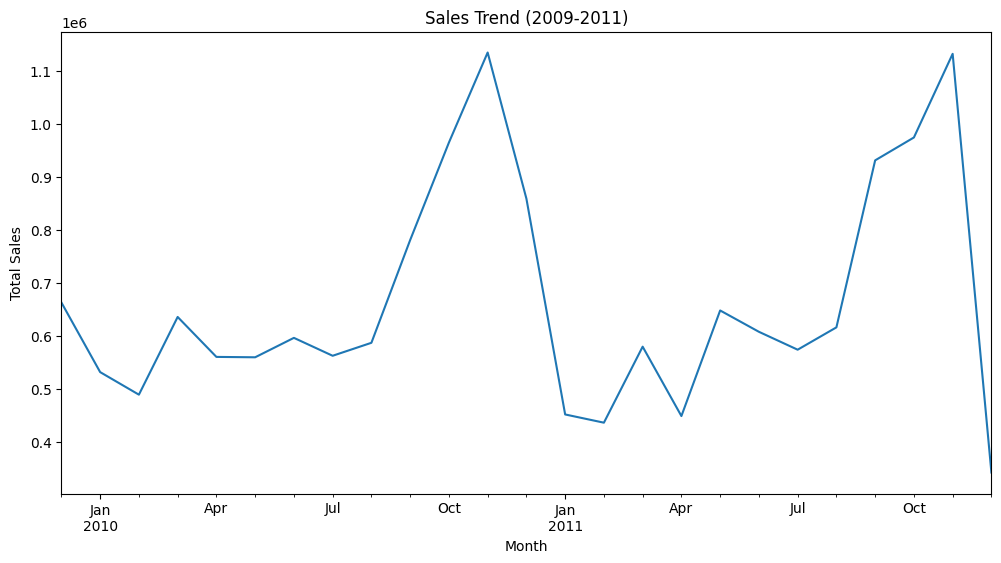

In [63]:
# Group by month and calculate total sales
sales_trend = df.groupby(df['InvoiceDate'].dt.to_period('M')).sum()['Total']

# Plot the sales trend
sales_trend.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend (2009-2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

C:\Users\impej\AppData\Local\Temp\ipykernel_6776\389819957.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_trend = data.groupby(data['InvoiceDate'].dt.to_period('M')).sum()['Total']


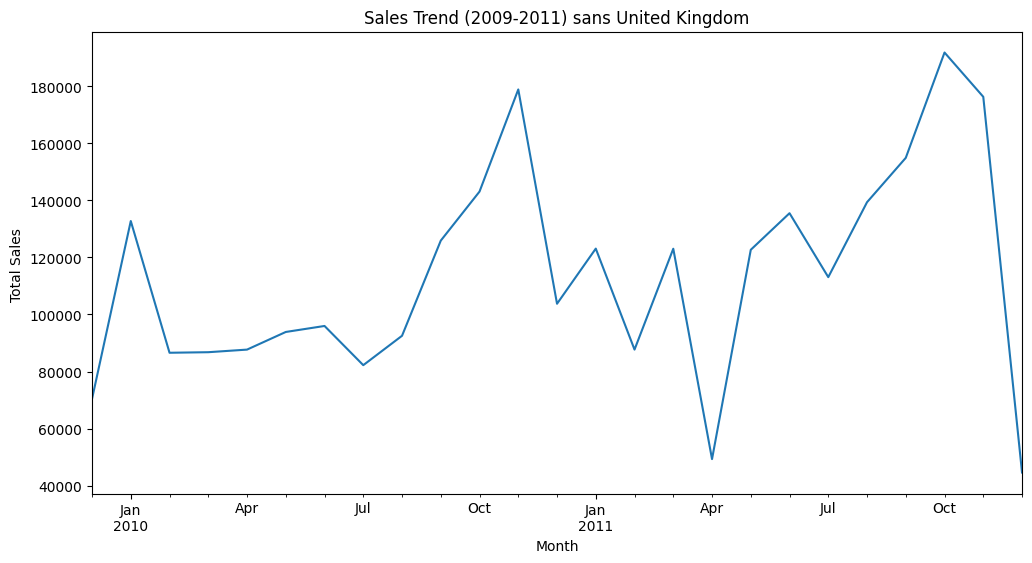

In [64]:
# Remplacez "df" par le nom de votre dataframe
data = df[df['Country'] != 'United Kingdom']

# Group by month and calculate total sales
sales_trend = data.groupby(data['InvoiceDate'].dt.to_period('M')).sum()['Total']

# Plot the sales trend
sales_trend.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend (2009-2011) sans United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Sales ')
plt.show()
